In [1]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

#API for data

In [2]:
endpoint = 'https://api.fda.gov/food/event.json'

Read in 2v of CSV

In [3]:
df = pd.read_csv(r"c:\Users\16159\Documents\nss_da\projects\capstone\data\caers_v2.csv")

In [4]:
df.head()

,Unnamed: 0,report_number,outcomes,date_created,reactions,date_started,products,consumer.gender,consumer.age,consumer.age_unit,year_created,role,name_brand,industry_code,industry_name
0,0,2022-CFS-012051,"['Death', 'Hospitalization', 'Other Serious or...",2021-12-14,"['Death', 'Ovarian cancer stage III', 'Uterine...",20080730.0,"[{'role': 'SUSPECT', 'name_brand': 'EXEMPTION ...",Female,65.0,year(s),2021,SUSPECT,EXEMPTION 4,53,Cosmetics
1,1,2022-CFS-014209,['Other Serious or Important Medical Event'],2022-09-20,"['Disability', 'Euphoric mood', 'Paranoia']",20220916.0,"[{'role': 'SUSPECT', 'name_brand': 'MYSTIC LAB...",Female,37.0,year(s),2022,SUSPECT,MYSTIC LABS COSMIC PEACH DELTA 8 GUMMIES,33,Candy W/O Choc/Special/Chew Gum
2,2,2022-CFS-012981,['Other Serious or Important Medical Event'],2021-12-28,['Fallopian tube cancer'],20160809.0,"[{'role': 'SUSPECT', 'name_brand': 'EXEMPTION ...",Female,56.0,year(s),2021,SUSPECT,EXEMPTION 4,53,Cosmetics
3,3,2022-CFS-013319,"['Death', 'Other Serious or Important Medical ...",2021-12-30,"['Death', 'Endometrial cancer']",20080313.0,"[{'role': 'SUSPECT', 'name_brand': 'EXEMPTION ...",Female,58.0,year(s),2021,SUSPECT,EXEMPTION 4,53,Cosmetics
4,4,2022-CFS-015815,['Other Outcome'],2022-11-02,"['Erythema', 'Pruritus', 'Skin irritation']",20211029.0,"[{'role': 'SUSPECT', 'name_brand': 'DOVE VOLUM...",Female,27.5,year(s),2022,SUSPECT,DOVE VOLUME AND FULLNESS DRY SHAMPOO,53,Cosmetics


In [5]:
#Data types

print(df.dtypes)

Unnamed: 0             int64
report_number         object
outcomes              object
date_created          object
reactions             object
date_started         float64
products              object
consumer.gender       object
consumer.age         float64
consumer.age_unit     object
year_created           int64
role                  object
name_brand            object
industry_code         object
industry_name         object
dtype: object


In [6]:
#How much data

print(df.shape)


(49743, 15)


In [7]:
unique_industries = df['industry_name'].unique()
for industry in unique_industries:
    print(industry)

Cosmetics
Candy W/O Choc/Special/Chew Gum
Vit/Min/Prot/Unconv Diet(Human/Animal)
Ice Cream Prod
Cereal Prep/Breakfast Food
Nuts/Edible Seed
Prep Salad Prod
Soft Drink/Water
Bakery Prod/Dough/Mix/Icing
Fruit/Fruit Prod
Whole Grain/Milled Grain Prod/Starch
Soup
Vegetables/Vegetable Products
Dressing/Condiment
Powder Formula
Snack Food Item
Mult Food Dinner/Grav/Sauce/Special
Dietary Conventional Foods/Meal Replacements
Filled Milk/Imit Milk Prod
Macaroni/Noodle Prod
Fishery/Seafood Prod
Coffee/Tea
Beverage Bases/Conc/Nectar
Spices, Flavors And Salts
Choc/Cocoa Prod
Medical Foods, N.E.C.
Food Additives (Human Use)
Cheese/Cheese Prod
Vegetable Protein Prod
Ready to Serve Formula
Baby Food Products
Egg/Egg Prod
Milk/Butter/Dried Milk Prod
Meat, Meat Products and Poultry
Gelatin/Rennet/Pudding Mix/Pie Filling
Color Additiv Food/Drug/Cosmetic
Vegetable Oils
Alcoholic Beverage
Food Sweeteners (Nutritive)
Formula, Form Unspecified
Miscellaneous Food Related Items
Food Service/Conveyance
Formula

In [8]:
num_unique_industries = df['industry_name'].nunique()

print(num_unique_industries)

44


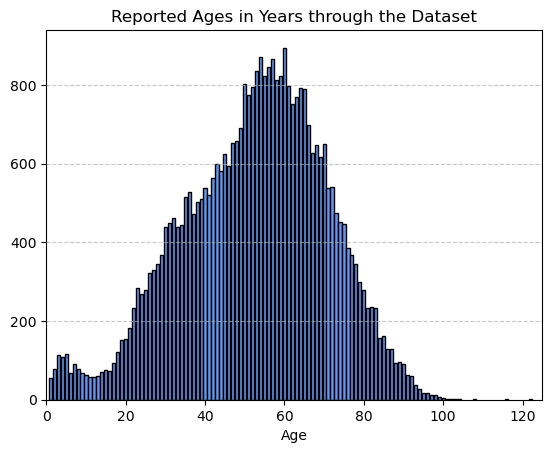

In [39]:

filtered_df = df[df['consumer.age_unit'] == 'year(s)']
x = filtered_df['consumer.age'].astype(int) 
age_counts = x.value_counts().sort_index()

plt.bar(age_counts.index, age_counts.values, color='cornflowerblue', edgecolor='black')
plt.xlim(0, 125)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xlabel('Age')
plt.ylabel('')
plt.title('Reported Ages in Years through the Dataset')

plt.show()

In [10]:
age_counts = df[df['consumer.age_unit'] == 'year(s)']['consumer.age'].value_counts()

most_reported_age = age_counts.idxmax()
frequency = age_counts.max()

print("The most reported age is:", most_reported_age, "years")
print("It was reported", frequency, "times.")

The most reported age is: 60.0 years
It was reported 844 times.


In [11]:
n = 5
filtered_df = df[df['consumer.age_unit'] == 'year(s)']
age_counts = filtered_df['consumer.age'].value_counts()

top_5_ages = age_counts.head(n).index.tolist()

print(top_5_ages)

[60.0, 57.0, 54.0, 53.0, 56.0]


In [12]:
max_age = df[df['consumer.age_unit'] == 'year(s)']['consumer.age'].max()
print(max_age)

122.75


In [13]:
n = 5
filtered_df = df[df['consumer.age_unit'] == 'year(s)']
age_counts = filtered_df['consumer.age'].value_counts()

top_5_ages = age_counts.head(n)

print("Top 5 most frequent ages and their counts:")
for age, count in top_5_ages.items():
    print(f"Age: {age}, Count: {count}")


Top 5 most frequent ages and their counts:
Age: 60.0, Count: 844
Age: 57.0, Count: 832
Age: 54.0, Count: 831
Age: 53.0, Count: 794
Age: 56.0, Count: 793


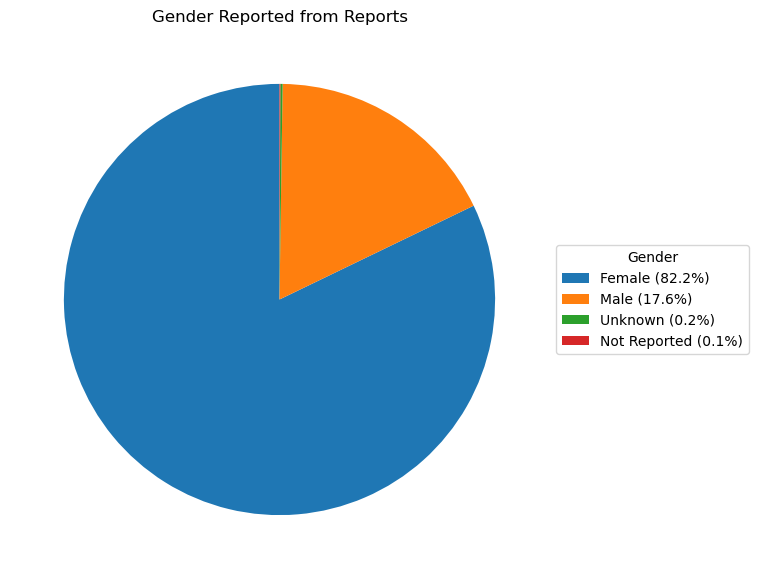

In [38]:
labels = df['consumer.gender'].value_counts().index
sizes = df['consumer.gender'].value_counts().values

total = sum(sizes)
percentages = [(size / total) * 100 for size in sizes]

fig, ax = plt.subplots(figsize=(10, 7))
wedges, _, autotexts = ax.pie(sizes, labels=None, autopct='', startangle=90)

legend_labels = [f'{label} ({percentage:.1f}%)' for label, percentage in zip(labels, percentages)]
ax.legend(wedges, legend_labels, title='Gender', loc='center left', bbox_to_anchor=(1, 0, 0.5, 1))

ax.set_title('Gender Reported from Reports')

plt.show()


In [15]:
frequency_of_appearances = df['industry_name'].value_counts()[:5].sort_values(ascending=False)

print(frequency_of_appearances)

industry_name
Cosmetics                                 28592
Vit/Min/Prot/Unconv Diet(Human/Animal)    11533
Nuts/Edible Seed                           1892
Vegetables/Vegetable Products              1042
Cereal Prep/Breakfast Food                  789
Name: count, dtype: int64


In [16]:
n = 5
top_5_industries = df['industry_name'].value_counts()[:n].index.tolist()

print(top_5_industries)

['Cosmetics', 'Vit/Min/Prot/Unconv Diet(Human/Animal)', 'Nuts/Edible Seed', 'Vegetables/Vegetable Products', 'Cereal Prep/Breakfast Food']


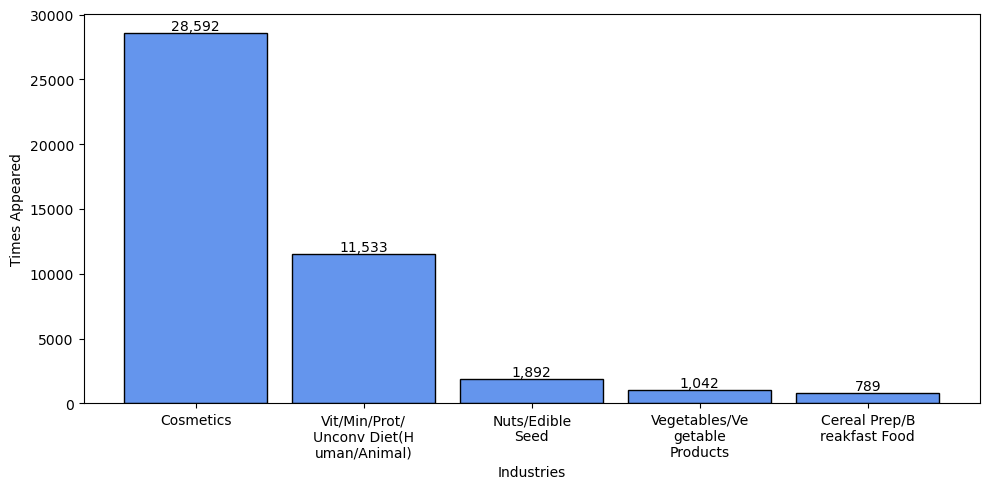

In [17]:
import textwrap

fig = plt.figure(figsize=(10, 5))

wrapped_labels = [textwrap.fill(label, width=13) for label in top_5_industries]

bars = plt.bar(wrapped_labels, frequency_of_appearances, width=0.85, color='cornflowerblue', edgecolor='black')

plt.xlabel("Industries")
plt.ylabel("Times Appeared")

for bar, count in zip(bars, frequency_of_appearances):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(),
             '{:,}'.format(count), ha='center', va='bottom')
    
plt.tight_layout()
plt.show()

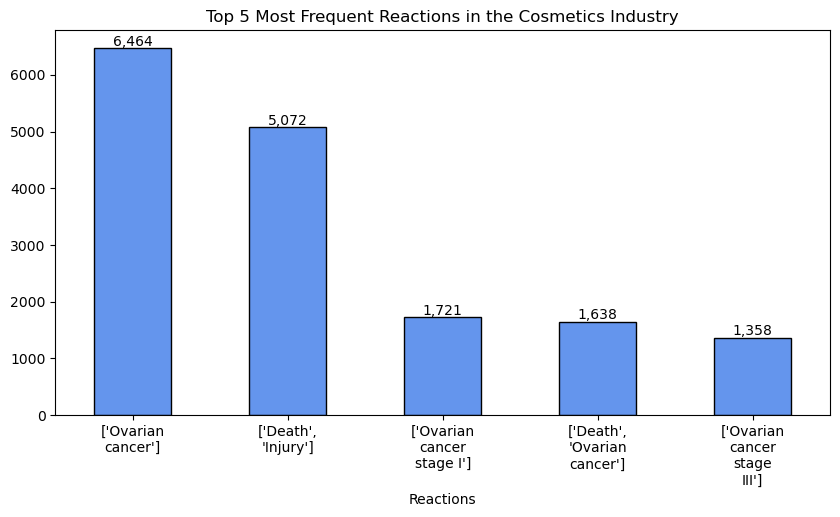

In [40]:
cosmetics_df = df[df['industry_name'] == 'Cosmetics']
n = 5
top_5_reactions = cosmetics_df['reactions'].value_counts().head(n)

wrapped_labels = [textwrap.fill(label, width=10) for label in top_5_reactions.index]

fig, ax = plt.subplots(figsize=(10, 5))
bars = top_5_reactions.plot(kind='bar', color='cornflowerblue', edgecolor='black')

plt.xlabel("Reactions")
plt.ylabel("")
plt.title("Top 5 Most Frequent Reactions in the Cosmetics Industry")
plt.xticks(range(len(wrapped_labels)), wrapped_labels, rotation=0, ha='center')  # Horizontal labels

for bar, count in zip(bars.patches, top_5_reactions):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(),
             '{:,}'.format(count), ha='center', va='bottom')

plt.show()


In [19]:
print(top_5_reactions)

reactions
['Ovarian cancer']              6464
['Death', 'Injury']             5072
['Ovarian cancer stage I']      1721
['Death', 'Ovarian cancer']     1638
['Ovarian cancer stage III']    1358
Name: count, dtype: int64


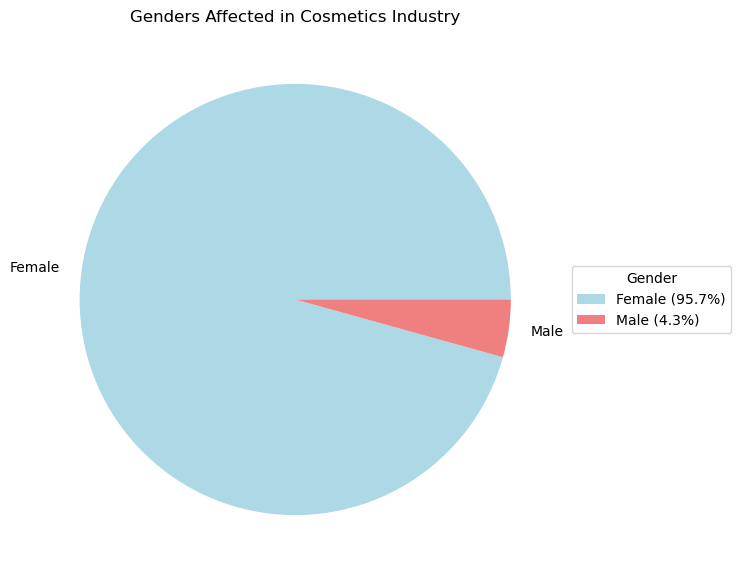

In [41]:
cosmetics_df = df[df['industry_name'] == 'Cosmetics']

gender_distribution = cosmetics_df[cosmetics_df['consumer.gender'].isin(['Male', 'Female'])]['consumer.gender'].value_counts()

fig, ax = plt.subplots(figsize=(10, 7))
wedges, texts, autotexts = ax.pie(gender_distribution, labels=gender_distribution.index, autopct='', colors=['lightblue', 'lightcoral'])

ax.set_title('Genders Affected in Cosmetics Industry')

total = gender_distribution.sum()
percentages = [(count / total) * 100 for count in gender_distribution]

legend_labels = [f'{label} ({percentage:.1f}%)' for label, percentage in zip(gender_distribution.index, percentages)]
ax.legend(wedges, legend_labels, title='Gender', loc='center left', bbox_to_anchor=(1, 0, 0.5, 1))

plt.show()


In [21]:
cosmetics_ovarian_df = df[(df['industry_name'] == 'Cosmetics') & (df['reactions'] == "['Ovarian cancer']")]
top_brands = cosmetics_ovarian_df['name_brand'].value_counts().head(3)

print("Top 3 brands in the Cosmetics industry causing Ovarian cancer:")
print(top_brands)


Top 3 brands in the Cosmetics industry causing Ovarian cancer:
name_brand
EXEMPTION 4                6106
JOHNSONS POWDER NO UPC      356
SHOWER TO SHOWER NO UPC       2
Name: count, dtype: int64


In [22]:
cosmetics_ovarian_df = df[(df['industry_name'] == 'Cosmetics') & (df['reactions'] == "['Death', 'Injury']")]
top_brands = cosmetics_ovarian_df['name_brand'].value_counts().head(3)

print("Top 3 brands in the Cosmetics industry causing Ovarian cancer:")
print(top_brands)


Top 3 brands in the Cosmetics industry causing Ovarian cancer:
name_brand
EXEMPTION 4                4951
JOHNSONS POWDER NO UPC      120
SHOWER TO SHOWER NO UPC       1
Name: count, dtype: int64


In [23]:
cosmetics_df = df[df['industry_name'] == 'Cosmetics']
top_5_brands = cosmetics_df['name_brand'].value_counts().head(5)

print("Top 5 name brands and their counts in the Cosmetics industry:")
print(top_5_brands)

Top 5 name brands and their counts in the Cosmetics industry:
name_brand
EXEMPTION 4               23253
JOHNSONS POWDER NO UPC     1717
DEVACURL                     53
DOVE DRY SHAMPOO             41
EOS LIP BALM                 40
Name: count, dtype: int64


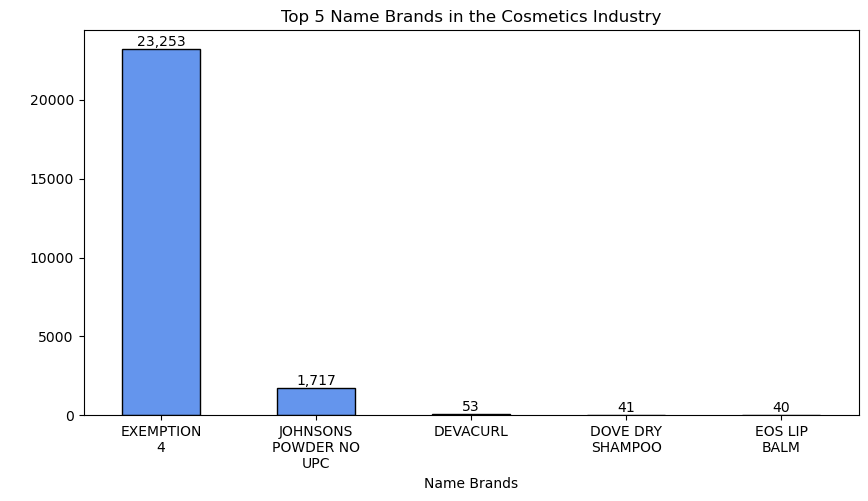

In [42]:
cosmetics_df = df[df['industry_name'] == 'Cosmetics']
top_5_brands = cosmetics_df['name_brand'].value_counts().head(5)

wrapped_labels = [textwrap.fill(label, width=10) for label in top_5_brands.index]

fig, ax = plt.subplots(figsize=(10, 5))
bars = top_5_brands.plot(kind='bar', color='cornflowerblue', edgecolor='black')

plt.xlabel("Name Brands")
plt.ylabel(" ")
plt.title("Top 5 Name Brands in the Cosmetics Industry")
plt.xticks(range(len(wrapped_labels)), wrapped_labels, rotation=0, ha='center')  # Horizontal labels

for bar, count in zip(bars.patches, top_5_brands):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(),
             '{:,}'.format(count), ha='center', va='bottom')

plt.show()


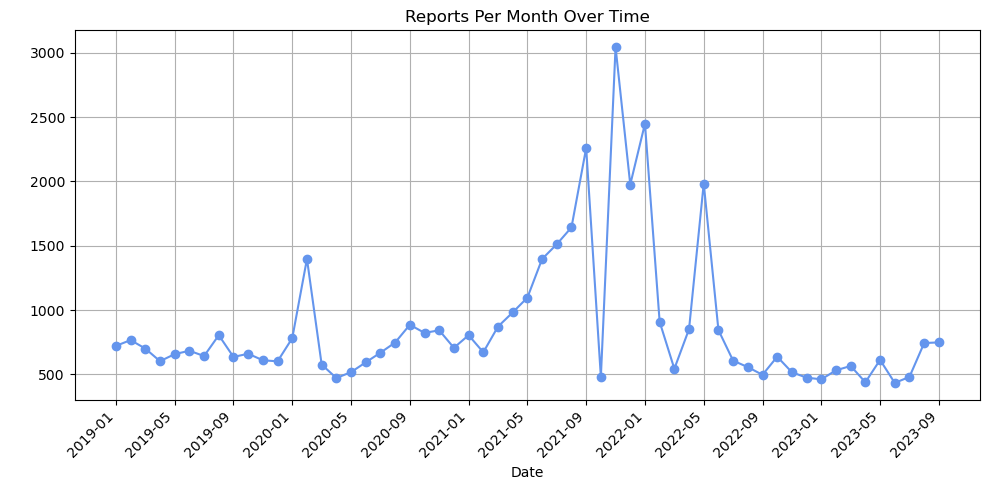

In [34]:
df['date_created'] = pd.to_datetime(df['date_created'])

max_reports_per_month = df.groupby(df['date_created'].dt.to_period("M"))['report_number'].count()

x_labels = max_reports_per_month.index[::4].astype(str)

fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(max_reports_per_month.index.astype(str), max_reports_per_month.values, marker='o', linestyle='-', color='cornflowerblue')

plt.xlabel("Date")
plt.ylabel(" ")
plt.title("Reports Per Month Over Time")
plt.xticks(x_labels, rotation=45, ha='right')
plt.grid(True)
plt.tight_layout()  
plt.show()

In [43]:
df['date_created'] = pd.to_datetime(df['date_created'])

reports_per_date = df.groupby(df['date_created'].dt.date)['report_number'].count()

date_with_max_reports = reports_per_date.idxmax()

max_reports = reports_per_date.max()

print(f"The date with the maximum number of adverse events is {date_with_max_reports} with {max_reports} reports.")

The date with the maximum number of adverse events is 2022-05-23 with 825 reports.
